### A hypothetical scenario is created to analyze the one of business metric i.e. Churn Rate
   - **Churn Rate:** Churn means the number of customers or subscribers who stop using your services during a given period.
   - **How to calculate Churn Rate:**
        - **Churn Rate  =  No. of customers left / (No. of customers left + No. of customers existing)**
   - **Scenario:** It is a local gym "Muscle labs" subscription dataset. This gym was bought by some other person on 1 January 2013. Now it's early December 2014 and the gym owner wants to check the one-year performance of the gym.
   
### As a data analyst, we aim to find out the churn rate of the gym.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
subs = pd.read_csv("muscle_labs.csv")

In [3]:
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500


In [4]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 6 columns):
id                     10497 non-null int64
customer_id            10497 non-null int64
end_date               10497 non-null object
start_date             10497 non-null object
subscription_period    10497 non-null object
price                  10497 non-null int64
dtypes: int64(3), object(3)
memory usage: 492.2+ KB


In [5]:
subs = pd.read_csv("muscle_labs.csv", parse_dates = ["end_date", "start_date"])

In [6]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 6 columns):
id                     10497 non-null int64
customer_id            10497 non-null int64
end_date               10497 non-null datetime64[ns]
start_date             10497 non-null datetime64[ns]
subscription_period    10497 non-null object
price                  10497 non-null int64
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 492.2+ KB


In [7]:
subs["ChurnMonth"] = subs["end_date"].dt.year*100 + subs["end_date"].dt.month

In [8]:
subs.head()

,id,customer_id,end_date,start_date,subscription_period,price,ChurnMonth
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201411
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500,201411
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500,201412
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500,201511


### Now we find out that in every month how many people left us. So, for that, we groupby our data based on the ChurnMonth column. 

In [9]:
churn = subs.groupby("ChurnMonth").size()

In [10]:
churned = pd.DataFrame(churn, columns = ["Total_Churned"])

In [11]:
churned.head()

,Total_Churned
ChurnMonth,
201103,8
201104,16
201105,29
201106,27
201107,37


- As we known year starts from January but in our dataset, churn data starts from march which indicates that some values are missing. Now we add the first two months to our data.

In [12]:
years = list(range(2011,2015))
months = list(range(1,13))

yearmonth = []

for i in years:
    for m in months:
        yearmonth.append(i*100+m)

In [13]:
print(yearmonth) 

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412]


In [14]:
x = pd.DataFrame({"yearmonths": yearmonth})
x.head()

,yearmonths
0,201101
1,201102
2,201103
3,201104
4,201105


In [15]:
df_churned = pd.merge(right = churned, left = x, how = "left", left_on = "yearmonths", right_index = True)

In [16]:
df_churned.head()

,yearmonths,Total_Churned
0,201101,NaN
1,201102,NaN
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [17]:
df_churned.fillna(0, inplace = True)

In [18]:
df_churned.head()

,yearmonths,Total_Churned
0,201101,0.0
1,201102,0.0
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [19]:
import datetime as dt

In [20]:
def total_members(ym):
    d = ym
    y = d//100
    m = d-y*100
    
    # import datetime as dt
    date = dt.datetime(y, m, 1)
    
    start = subs["start_date"]
    end = subs["end_date"]

    bol = (start < date) & (date <= end)
    return bol.sum()

In [21]:
df_churned.head()

,yearmonths,Total_Churned
0,201101,0.0
1,201102,0.0
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [22]:
df_churned["Total_members"] = df_churned["yearmonths"].apply(total_members)

In [23]:
df_churned.head()

,yearmonths,Total_Churned,Total_members
0,201101,0.0,0
1,201102,0.0,17
2,201103,8.0,47
3,201104,16.0,82
4,201105,29.0,105


In [24]:
df_churned["Churn_rate"] = df_churned["Total_Churned"]/df_churned.Total_members

In [25]:
df_churned.head()

,yearmonths,Total_Churned,Total_members,Churn_rate
0,201101,0.0,0,NaN
1,201102,0.0,17,0.000000
2,201103,8.0,47,0.170213
3,201104,16.0,82,0.195122
4,201105,29.0,105,0.276190


In [26]:
df_churned.fillna(0, inplace = True)

In [27]:
df_churned.head()

,yearmonths,Total_Churned,Total_members,Churn_rate
0,201101,0.0,0,0.000000
1,201102,0.0,17,0.000000
2,201103,8.0,47,0.170213
3,201104,16.0,82,0.195122
4,201105,29.0,105,0.276190


In [28]:
df_churned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
yearmonths       48 non-null int64
Total_Churned    48 non-null float64
Total_members    48 non-null int64
Churn_rate       48 non-null float64
dtypes: float64(2), int64(2)
memory usage: 1.6 KB


In [29]:
df_churned["yearmonths"]= df_churned["yearmonths"].astype(str)

In [30]:
from matplotlib.patches import Ellipse

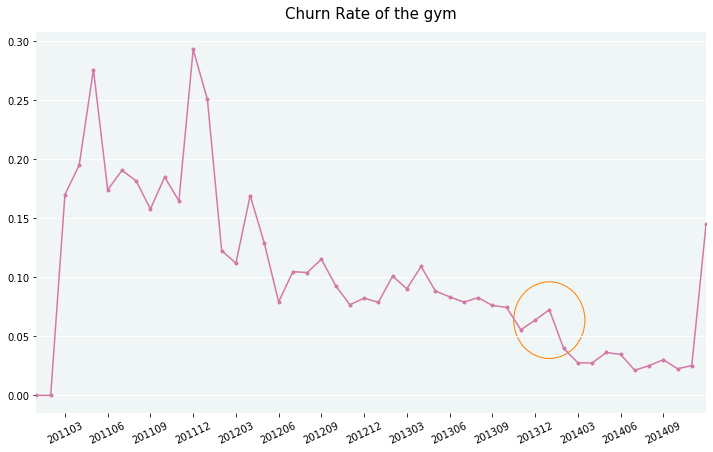

In [44]:
ax = df_churned.plot(x = "yearmonths",y = "Churn_rate" , kind = "line", rot = 25, figsize = (12,7), 
             marker = ".", color = "#d279a6")
start, end = ax.get_xlim()
plt.title("Churn Rate of the gym", y = 1.02, fontsize = 15)
# ax.get_xticks()
plt.xticks(np.arange(2, end, 3),df_churned["yearmonths"][2::3])
# ax.set_xticklabels(df["yearmonths"][2::3])
y = df_churned.loc[df_churned["yearmonths"]=="201312","Churn_rate"].iloc[0]
x = 36
circle =  Ellipse((x,y),5,0.065, color = "#ff8000", fill = False)
ax.add_artist(circle)


# ax.axes.get_xaxis().set_label_text("")
ax.xaxis.label.set_visible(False)
# plt.legend("")
ax.get_legend().remove()
ax.set_facecolor(color = "#f0f5f5")
ax.grid(linestyle = "-", linewidth = 1 , color = "white", axis = "y",)
for value in ax.spines.values():
     value.set_visible(False)


plt.savefig("Churn Rate of the gym.png")
plt.show()

### CONCLUSION
   - From the analysis, we can see that the churn rate is very erratic at the beginning. In the starting months when we take over the business in January 2013, the churn rate started to become more stable.
   - But there at the end of 2013 and beginning of 2014, there was a relatively large spike in the churn rate (circled). Maybe the increased rate is due to the subscription expired because one year is completed. And when the subscription expired automatically person is churned.
   - A few actions that we could take to reactivate these customers are:
        - Make a new promotion specifically for the quitters.
        - Make a new promotion specifically for the customers who attended the gym until the end.
        - Throw in some perks in addition to the standard service for the customers who didn't quit.